In [1]:
from skmap.modeler import RFRegressorDepths, PredictedDepths
from skmap.catalog import s3_setup, DataCatalog, s3_list_files
from skmap.loader import TiledDataLoader
from skmap.misc import TimeTracker
import os
from skmap.misc import GoogleSheet
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import warnings
import skmap_bindings as sb
import random
import json
import tl2cgen
warnings.filterwarnings("ignore", module="sklearn")

version = '20250113'


YEARS = range(2015,2023)
DEPTHS = [0, 30]
QUANTILES = [0.16, 0.84]

catalog_csv = '/mnt/slurm/jobs/global_soc/global_soil_mapping.csv'
TILES_PATH = '/mnt/slurm/jobs/global_soc/ard2_final_status.gpkg'
MODEL_PATH = '/mnt/slurm/jobs/global_soc'
TILES_SHUF = '/mnt/slurm/jobs/global_soc/tiles_shuf2.txt'
MASK_TEMPLATE_PATH = 'http://192.168.49.30:8333/global/tiled.masks/mask_landsat_glad.lc.landmask_glc.desert.ice/{tile_id}.tif'
GDAL_OPTS = {'GDAL_HTTP_VERSION': '1.0', 'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': '.tif'}
S3_PREFIX = '/tmp-gpw/global_soc_v5'
# S3_PREFIX = None

ACCESS_KEY = 'iwum9G1fEQ920lYV4ol9'
SECRET_KEY = 'GMBME3Wsm8S7mBXw3U4CNWurkzWMqGZ0n2rXHggS0'
THREADS = 96
GAIA_ADDRS = [f'http://192.168.49.{gaia_ip}:8333' for gaia_ip in range(30, 47)]
GDAL_OPTS = {'GDAL_HTTP_VERSION': '1.0', 'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': '.tif'}
s3_aliases = s3_setup(S3_PREFIX is not None, ACCESS_KEY, SECRET_KEY, GAIA_ADDRS)

resampling_strategy = "GRA_CubicSpline"
convert_nan_to_num = True
spatial_aggregation = False
res_str = '240m' if spatial_aggregation else '30m'


# tiles = gpd.read_file(TILES_PATH)
# # start_tile=max(int(sys.argv[1]), 0)
# # end_tile=min(int(sys.argv[2])+1, len(tiles))
# start_tile=0
# end_tile=1
# with open(TILES_SHUF, 'r') as file:
#     shuf = [int(line.strip()) for line in file]
# tile_ids = tiles['TILE'][shuf[start_tile:end_tile]].tolist()
# # server_name=sys.argv[3]
# server_name='ripley'
# base_dir = f'/mnt/{server_name}/global_soc/tmp_data'
# os.makedirs(f'/mnt/{server_name}/global_soc', exist_ok=True)
# os.makedirs(base_dir, exist_ok=True)

# # # bulk density
# # bulk_density_params = {
# #     'model':RFRegressorDepths(
# #         model_name='bulk.density',
# #         model_path=f'{MODEL_PATH}/model_rf.bulk.density_production_v{version}.joblib',
# #         model_covs_path=None,
# #         depth_var='hzn_dep',
# #         depths=DEPTHS,
# #         predict_fn=lambda predictor, data: predictor.predict(data)
# #     ),
# #     'expm1':False,
# #     'scale':100,
# #     'nodata':32767,
# #     'dtype':'int16',
# #     'prop_file_name':'bd.core_iso.11272.2017.g.cm3',
# #     's3_prefix':S3_PREFIX
# # }

# # # ocd
# # ocd_params = {
# #     'model':RFRegressorDepths(
# #         model_name='ocd', 
# #         model_path=f'{MODEL_PATH}/model_rf.ocd_production_v{version}.joblib',
# #         model_covs_path=None,
# #         depth_var='hzn_dep',
# #         depths=DEPTHS,
# #         predict_fn=lambda predictor, data: predictor.predict(data)
# #     ),
# #     'expm1':True,
# #     'scale':10,
# #     'nodata':32767, 
# #     'dtype':'int16',
# #     'prop_file_name':'oc_iso.10694.1995.mg.cm3',
# #     's3_prefix':S3_PREFIX
# # }

# # soc
# soc_params = {
#     'model':RFRegressorDepths(
#         model_name='soc', 
#         model_path=f'{MODEL_PATH}/model_rf.soc_production_v{version}.joblib',
#         model_covs_path=None,
#         depth_var='hzn_dep',
#         depths=DEPTHS,
#         predict_fn=lambda predictor, data: predictor.predict(data)
#     ),
#     'expm1':True,
#     'scale':10,
#     'nodata':32767,
#     'dtype':'int16',
#     'prop_file_name':'oc_iso.10694.1995.wpct',
#     's3_prefix':S3_PREFIX
# }

# # # ph h2o
# # ph_h2o_params = {
# #     'model':RFRegressorDepths(
# #         model_name='ph.h2o',
# #         model_path=f'{MODEL_PATH}/model_rf.ph.h2o_production_v{version}.joblib',
# #         model_covs_path=None,
# #         depth_var='hzn_dep',
# #         depths=DEPTHS,
# #         predict_fn=lambda predictor, data: predictor.predict(data)
# #     ),
# #     'expm1':False,
# #     'scale':10,
# #     'nodata':255,
# #     'dtype':'uint8',
# #     'prop_file_name':'ph.h2o_iso.10390.2021.index',
# #     's3_prefix':S3_PREFIX
# # }

# properties_model_params = [
#     soc_params
# ]

# properties_features = {f for params in properties_model_params for f in params['model'].model_features}

# catalog = DataCatalog.create_catalog(catalog_def=catalog_csv, years=YEARS, base_path=GAIA_ADDRS)
# YEARS_srt = [str(y) for y in YEARS]
# catalog.query(properties_features, YEARS_srt)
# properties_data = TiledDataLoader(catalog, MASK_TEMPLATE_PATH, spatial_aggregation, resampling_strategy, GDAL_OPTS, THREADS)
# catalog.save_json('properties_catalog.json')

Added `g0` successfully.
Added `g1` successfully.
Added `g2` successfully.
Added `g3` successfully.
Added `g4` successfully.
Added `g5` successfully.
Added `g6` successfully.
Added `g7` successfully.
Added `g8` successfully.
Added `g9` successfully.
Added `g10` successfully.
Added `g11` successfully.
Added `g12` successfully.
Added `g13` successfully.
Added `g14` successfully.
Added `g15` successfully.
Added `g16` successfully.


In [2]:
file = './GLO30_30m_v01272022.tif'
file3 = '/vsicurl/http://192.168.49.30:8333/prod-landsat-ard2/179W_66N/v1_masked/swir1_glad.swa.ard2_m_30m_s_20211101_20211231_go_epsg.4326_v1.tif'
file2 = '/vsicurl/http://192.168.49.30:8333/tmp-gpw/global_soc_v6/179W_66N/oc_iso.10694.1995.mg.cm3_p84_240m_b60cm..100cm_20050101_20101231_g_epsg.4326_v20250122.tif'
from skmap.loader import warp_tile


In [3]:
x_size3, y_size3 = 4004, 4004
data3 = np.empty((1, x_size3*y_size3), dtype=np.float32)
sb.readDataCore(data3, 96, file3, 0, 0, x_size3, y_size3, [1], GDAL_OPTS, None, np.nan)
data3r = np.reshape(data3[0,:], (x_size3, y_size3))


MIASOOOO
255nodata_val
BAUUU
value_to_mask.value() 255
value_to_set.value() nan


In [4]:
x_size2, y_size2 = 500, 500
data2 = np.empty((1, x_size2*y_size2), dtype=np.float32)
sb.readDataCore(data2, 96, file2, 0, 0, x_size2, y_size2, [1], GDAL_OPTS, None, np.nan)
data2r = np.reshape(data2[0,:], (x_size2, y_size2))

MIASOOOO
32767nodata_val
BAUUU
value_to_mask.value() 32767
value_to_set.value() nan


In [6]:
x_size, y_size = 20010, 20010
# data = np.empty((1, x_size * y_size), dtype=np.float32)
# sb.readDataCore(data, 96, file, 0, 0, x_size, y_size, [1], GDAL_OPTS, None, np.nan)
# datar = np.reshape(data[0,:], (x_size, y_size))

ret = warp_tile(0, file, file, 1, x_size * y_size, resampling_strategy, GDAL_OPTS)
retr = np.reshape(ret, (x_size, y_size))

-32767 nodata_val
-32767 static_cast<float_t>(nodata_val)


In [7]:
retr[3,x_size-1]

0.0

In [55]:
datar[3,x_size-1]

nan

In [56]:
data2r[400,400]

nan

In [57]:
data3r[3200,3200]

nan

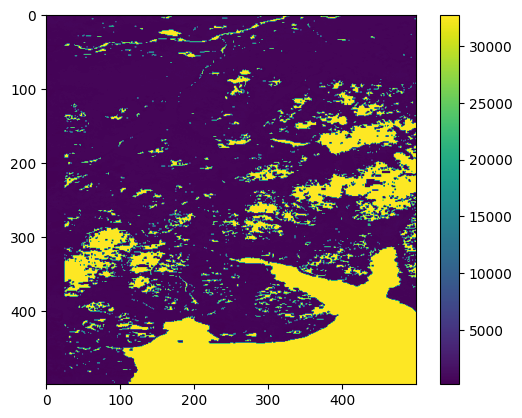

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data2r)
plt.colorbar()
plt.show()

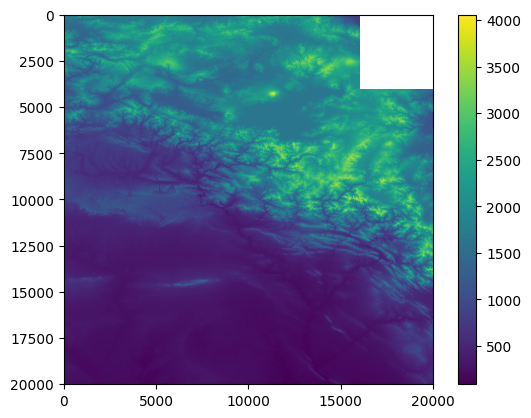

In [58]:
import matplotlib.pyplot as plt
plt.imshow(datar)
plt.colorbar()
plt.show()

In [7]:
for tile_id in ['005W_42N']:
    skip_flag = True
    computed_list = s3_list_files(s3_aliases, S3_PREFIX, tile_id)
    for params in properties_model_params:
        computed_list_prop = [s for s in computed_list if params['prop_file_name'] in s]
        computed_list_prop = [s for s in computed_list_prop if f'g_epsg.4326_v{version}.2' in s]
        computed_list_prop = [s for s in computed_list_prop if f'_{res_str}_' in s]
        if not(len(computed_list_prop) == \
            (len(QUANTILES) + 1) * (len(DEPTHS) - 1) * len(YEARS)):
            skip_flag = False
    if skip_flag:
        print(f"All properties for tile {tile_id} already computed, skipping...")
        continue
    with TimeTracker(f" - Reading data for tile {tile_id}", False):
        properties_data.load_tile_data(tile_id)
        if properties_data.n_pixels_valid == 0:
            print("No pixels to predict in this tile, skipping")
            continue
        if convert_nan_to_num:
            properties_data.convert_nan_to_median()
            properties_data.convert_nan_to_value(0.0)
    for params in properties_model_params:
        with TimeTracker(f" # Modeling {params['prop_file_name']}", False):
            computed_list_prop = [s for s in computed_list if params['prop_file_name'] in s]
            computed_list_prop = [s for s in computed_list_prop if f'g_epsg.4326_v{version}.2' in s]
            computed_list_prop = [s for s in computed_list_prop if f'_{res_str}_' in s]
            if len(computed_list_prop) == \
                (len(QUANTILES) + 1) * (len(DEPTHS) - 1) * len(YEARS):
                print(f"{params['prop_file_name']} for tile {tile_id} already computed, skipping...")
                continue
            properties_model:RFRegressorDepths = params['model']
            n_files = (len(DEPTHS) - 1) * len(YEARS) * (len(QUANTILES) + 1)
            n_files_dephts = len(YEARS)  * (len(QUANTILES) + 1) # Offset of the dephts
            n_files_years = len(QUANTILES) + 1 # Offset of the years
            out_data_t = np.empty((properties_data.n_pixels_valid, n_files), dtype=np.float32)
            with TimeTracker(f" - Getting raw tree predictions", False):
                pred_trees = [properties_model.predictDepth(properties_data, i) for i in range(len(DEPTHS))]
            with TimeTracker(f" - Deriving statistics", False):
                # Compute derived statistics
                out_files = []
                for d in range(len(DEPTHS) - 1):
                    trees_avg = np.empty((properties_model.n_trees, properties_data.n_pixels_valid*len(YEARS)), dtype=np.float32)
                    sb.elementwiseAverage(trees_avg, THREADS, pred_trees[d], pred_trees[d+1])
                    trees_avg_t = np.empty((properties_data.n_pixels_valid*len(YEARS), properties_model.n_trees), dtype=np.float32)
                    sb.transposeArray(trees_avg, THREADS, trees_avg_t)
                    for y in range(len(YEARS)):
                        trees_avg_year_t = np.empty((properties_data.n_pixels_valid, properties_model.n_trees), dtype=np.float32)
                        sb.extractArrayRows(trees_avg_t, THREADS, trees_avg_year_t, range(properties_data.n_pixels_valid*y,properties_data.n_pixels_valid*(y+1)))
                        prop_mean = np.empty((properties_data.n_pixels_valid,), dtype=np.float32)
                        sb.nanMean(trees_avg_year_t, THREADS, prop_mean)
                        if params['expm1']:
                            np.expm1(prop_mean, out=prop_mean)
                            np.expm1(trees_avg_year_t, out=trees_avg_year_t)
                        PERCENTILES = [q*100. for q in QUANTILES]                    
                        offset_prop = d * n_files_dephts + y * n_files_years
                        sb.computePercentiles(trees_avg_year_t, THREADS, range(trees_avg_year_t.shape[1]), out_data_t, range(offset_prop+1,offset_prop+1+len(PERCENTILES)), PERCENTILES)
                        out_data_t[:,offset_prop] = prop_mean
                        out_files.append(f"{params['prop_file_name']}_m_{res_str}_b{DEPTHS[d]}cm..{DEPTHS[d+1]}cm_{YEARS[y]}0101_{YEARS[y]}1231_g_epsg.4326_v{version}.2")
                        for q in QUANTILES:
                            formatted_p = 'p0' if (q == 0) else ('p100' if (q == 1) else str(q).replace('0.','p'))
                            out_files.append(f"{params['prop_file_name']}_{formatted_p}_{res_str}_b{DEPTHS[d]}cm..{DEPTHS[d+1]}cm_{YEARS[y]}0101_{YEARS[y]}1231_g_epsg.4326_v{version}.2")

            with TimeTracker(f" - Saving results", False):
                write_data_t = np.empty((properties_data.n_pixels, n_files), dtype=np.float32)
                write_data = np.empty((n_files, properties_data.n_pixels), dtype=np.float32)
                sb.scaleAndOffset(out_data_t, THREADS, 0.5, params['scale'])
                sb.fillArray(write_data_t, THREADS, params['nodata'])
                sb.expandArrayRows(out_data_t, THREADS, write_data_t, properties_data.get_pixels_valid_idx(1))
                sb.transposeArray(write_data_t, THREADS, write_data)
                tile_dir = base_dir + f'/{tile_id}'
                os.makedirs(tile_dir, exist_ok=True)
                write_idx = range(len(out_files))
                compress_cmd = f"gdal_translate -a_nodata {params['nodata']} -co COMPRESS=deflate -co TILED=TRUE -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024"
                s3_out = None
                if S3_PREFIX is not None:
                    s3_out = [f'{s3_aliases[random.randint(0, len(s3_aliases) - 1)]}{S3_PREFIX}/{properties_data.tile_id}' for _ in range(len(out_files))]
                if params['dtype'] == 'int16':
                    sb.writeInt16Data(write_data, THREADS, GDAL_OPTS, [properties_data.mask_path for _ in range(len(out_files))], tile_dir, out_files, 
                                                     write_idx, 0, 0, properties_data.x_size, properties_data.y_size, int(params['nodata']), compress_cmd, s3_out)
                elif params['dtype'] == 'uint8':
                    sb.writeByteData(write_data, THREADS, GDAL_OPTS, [properties_data.mask_path for _ in range(len(out_files))], tile_dir, out_files, 
                                                         write_idx, 0, 0, properties_data.x_size, properties_data.y_size, int(params['nodata']), compress_cmd, s3_out)
                else:
                    assert(False, 'Not available save data type')
                print(f'Done, check mc ls gaia{S3_PREFIX}/{tile_id}/{out_files[0]}')
    
    if os.path.exists(properties_data.mask_path):
        os.remove(properties_data.mask_path)
        print(f"{properties_data.mask_path} has been deleted.")
    else:
        print(f"{properties_data.mask_path} does not exist.")



Checking `mc ls g0/tmp-gpw/global_soc_v5/005W_42N`...


NameError: name 'properties_model_params' is not defined